In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/My\ Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/*

In [ ]:
%cd /content/gdrive/My\ Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/

/content/gdrive/.shortcut-targets-by-id/13aHaot6tbm7SROiS_JzQgfDtjZ_DM4PH/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento


**LBPH**

**Codigo tomado de:**  https://fairyonice.github.io/implement-lbp-from%20scratch.html

-- >   **Lectura de las imagenes**

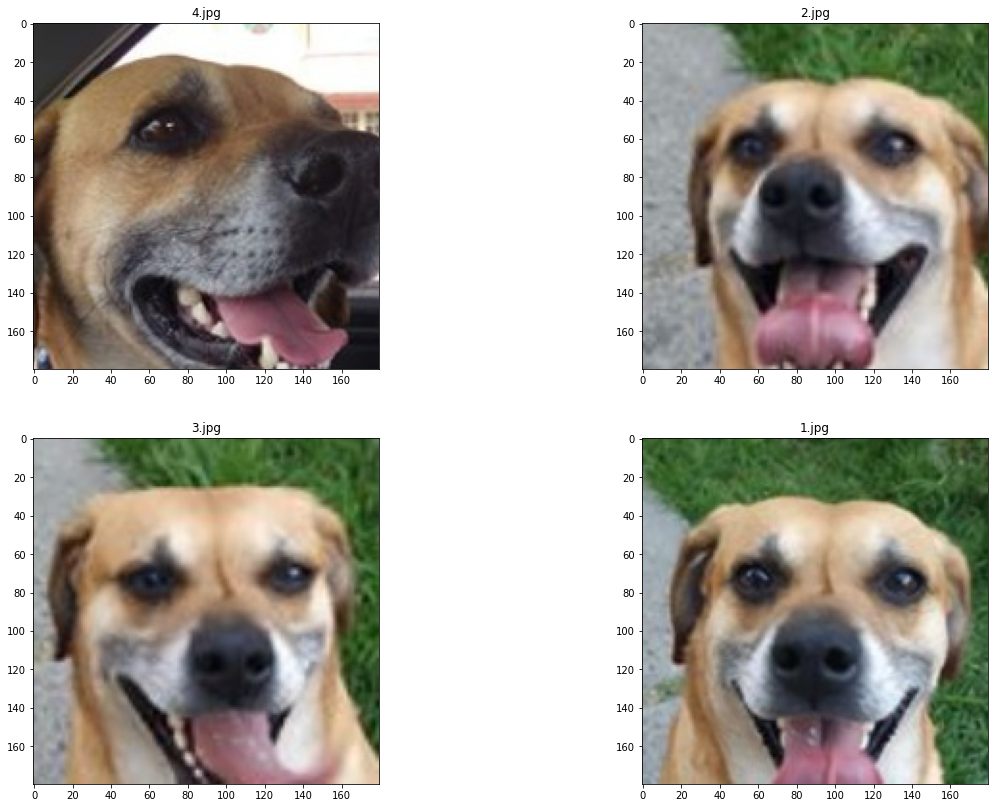

In [ ]:
import matplotlib.pyplot as plt
import cv2, os 
import numpy as np
dir_images = "LBPH_PRUEBA"
imgs = os.listdir(dir_images)

fig = plt.figure(figsize=(20,14))
for count, imgnm in enumerate(imgs,1):
    image = plt.imread(os.path.join(dir_images,imgnm))
    ax = fig.add_subplot(2,len(imgs)/2,count)
    ax.imshow(image)
    ax.set_title(imgnm)
plt.show()

-- >> **Función LBHP**

In [ ]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

-- >> **Imprime Resultados LPBH**

In [1]:
dir_images = "LBPH_PRUEBA/"
imgs = os.listdir(dir_images)
for imgnm in imgs:
    image = plt.imread(os.path.join(dir_images,imgnm))
    
    imgLBP    = getLBPimage(image)
    vecimgLBP = imgLBP.flatten()
    #Imprime imagen Original
    fig = plt.figure(figsize=(20,8))
    ax  = fig.add_subplot(1,3,1)
    ax.imshow(image)
    ax.set_title("gray scale image")
    ax  = fig.add_subplot(1,3,2)
    ax.imshow(imgLBP,cmap="gray")
    ax.set_title("LBP converted image")
    ax  = fig.add_subplot(1,3,3)
    freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
    ax.set_ylim(0,40000)
    lbp = lbp[:-1]
    ## print the LBP values when frequencies are high
    largeTF = freq > 5000
    for x, fr in zip(lbp[largeTF],freq[largeTF]):
        ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
    ax.set_title("LBP histogram")
    plt.show()

NameError: ignored

In [ ]:
dir_images = "2.Resultados_Preprocesamiento/Buscar_perro/ROSTRO_REDIMENSIONADO/1_Eimmy_Beagle"
path_resultado='4.Resultados_ext_caracteristicas/LBPH_Perros_Entrada/1_Eimmy_Beagle'
imgs = os.listdir(dir_images)
for imgnm in imgs:
    image = plt.imread(os.path.join(dir_images,imgnm))
    
    imgLBP    = getLBPimage(image)
    #Guarda imagenes imagenes con cuadros
    os.makedirs(path_resultado, exist_ok=True)
    filename=(path_resultado +'/' + 'PRUEBA_LBPH.jpeg') 
    cv2.imwrite(filename, imgLBP.reshape(180,180)) 

    vecimgLBP = imgLBP.flatten()
    #Imprime imagen Original
    fig = plt.figure(figsize=(20,8))
    ax  = fig.add_subplot(1,3,1)
    ax.imshow(image)
    ax.set_title("gray scale image")
    ax  = fig.add_subplot(1,3,2)
    ax.imshow(imgLBP,cmap="gray")
    ax.set_title("LBP converted image")
    ax  = fig.add_subplot(1,3,3)
    freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
    ax.set_ylim(0,40000)
    lbp = lbp[:-1]
    ## print the LBP values when frequencies are high
    largeTF = freq > 5000
    for x, fr in zip(lbp[largeTF],freq[largeTF]):
        ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
    ax.set_title("LBP histogram")
    plt.show()